# Iris Classification

In [36]:
# dataset
from sklearn import datasets
# plot
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
# data manipulation
import pandas as pd
import numpy as np
# To display image in the jupyter notebook cell
%matplotlib inline

## Question

In the last section, we learn about perceptron. How to use it to classify data? To answer this question, let's look at an example first: there is a data set which consists of two species of Iris. Our questions are: 

- How to classify those two species? 
- When given a new Iris, how to predict which Iris category it belongs to?

## Data Set

The data set we will use is modified from the Iris dataset which can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris/). It consists of 50 samples from each of **two species** of Iris (Iris setosa, Iris virginica). **Two features** were measured from each sample: the length of the sepals and petals, in centimeters.

Let's get a close look at the dataset.

In [37]:
# read csv file
iris_dataset = pd.read_csv("iris_data.csv")
# show the first 5 lines
iris_dataset.head()

,sepal length (cm),petal length (cm),target_class
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1


The columns in this dataset are:
- sepal length in cm
- petal length in cm
- Species
    - target_class 1: setosa
    - target_class -1: versicolor

![](./img/iris.png)

*Image source* [1](https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_versicolor_3.jpg) [2](http://www.twofrog.com/images/iris38a.jpg)


## Classification

The following graph showing the measured sepal length and sepal length of Iris.

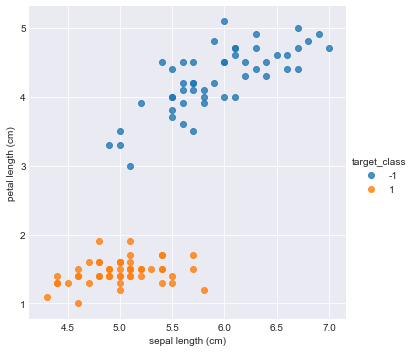

In [38]:
sns.lmplot("sepal length (cm)", "petal length (cm)", data=iris_dataset,fit_reg=False,hue="target_class")

I believe you can classify those two species category immediately with your eye. Do you remember our question: identify which category a new Iris belongs to?
Suppose the new Iris' sepal length is 5.5 cm and petal length is 3.2. We draw this new Iris point to the plot.

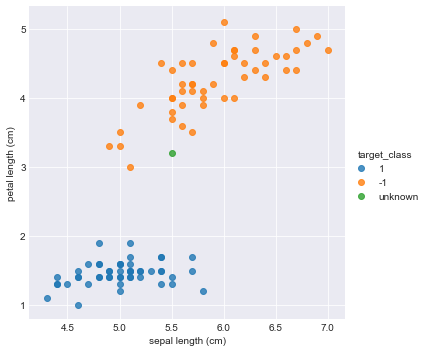

In [39]:
new_iris_dataset = iris_dataset.append([{"sepal length (cm)":5.5, "petal length (cm)":3.2,"target_class":"unknown"}])
sns.lmplot("sepal length (cm)", "petal length (cm)", data=new_iris_dataset,fit_reg=False,hue="target_class")

The unknown dot is the new Iris. Obviously, it belongs to versicolor specie (target_clss=-1).

### Linear Classifier

This task is easy for us. We can classify them by our eyes. However, the computer doesn't have eyes. How can they split those two groups?

You may have noticed that this is a two-dimensional plane, and if want to separate the two classes, we can put a line between them. It looks like the following plot.

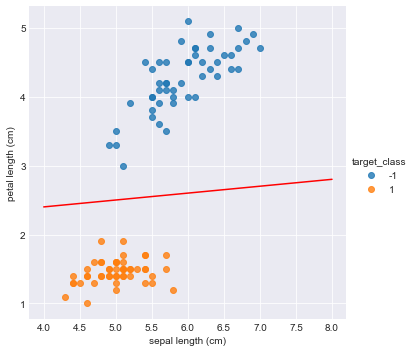

In [40]:
x = np.linspace(4,8,18)
a = 0.1
b = 2
y = a * x + b

sns.lmplot("sepal length (cm)", "petal length (cm)", data=iris_dataset,fit_reg=False,hue="target_class")
plt.plot(x, y, '-r')

All the points above the line are setosa category(-1), and all the points below the line are versicolor category(1). When a new Iris comes, a computer can predict which category it falls into by deciding whether it is above or below the line. 

Therefore, **if we can teach the computer to find such a kind of line, we can solve our problem!** Let's do it.

A line in a two-dimensional plane can be represented as follows:

$$ax + by + c = 0 $$

Let:

$$w_0 = c$$
$$w_1 = a$$
$$w_2 = b$$


Then it becomes:

$$w_1x + w_2y + w_0 = 0$$

Therefore, in mathematics form, all points above the line are:

$$w_1*x + w_2*y + w_0 > 0$$

And all points below and on the line are:

$$w_1*x + w_2*y + w_0 \leq 0$$


Actually, this is exactly **how a perceptron looks like when n = 2**:


$$
y=\left\{
\begin{array}{rcl}
0       &      & {w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n > 0}\\
1     &      & {w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n\leq 0}\\
\end{array} \right.
$$

let n = 2:

$$
y=\left\{
\begin{array}{rcl}
0       &      & {w_0 + w_1x_1 + w_2x_2 > 0}\\
1     &      & {w_0 + w_1x_1 + w_2x_2 \leq 0}\\
\end{array} \right.
$$


Because $f(x,y)$ is a linear function, we call it **a linear classifier**. To find a appropriate linear classifier of Iris, we need to find suitable $w_0,w_1$, and $w_3$.

## Implement a perceptron

To implement a perceptron, we manually choose suitable $w_0,w_1$, and $w_3$ parameters for it.

Let,
$$
w_0 = 2
w_1 = 0.1
w_2 = -1
$$

Then the line is:
$$2 + 0.1x_1 - x_2 = 0$$

The perceptron act like this:

$$
y=\left\{
\begin{array}{rcl}
0       &      & {2 + 0.1x_1 - x_2 > 0}\\
1     &      & {2 + 0.1x_1 - x_2 \leq 0}\\
\end{array} \right.
$$

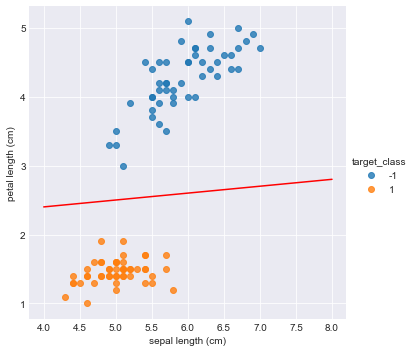

In [41]:
x_1 = np.linspace(4,8,18)

w_0 = 2
w_1 = 0.1
w_2 = -1
x_2 = a * x_1 + b

sns.lmplot("sepal length (cm)", "petal length (cm)", data=iris_dataset,fit_reg=False,hue="target_class")
plt.plot(x_1, x_2, '-r')

Here, we define a function perceptron which takes $x_1,x_2$ as inputs.

In [42]:
def perceptron(x1,x2):
    w0 = 2
    w1 = 0.1
    w2 = -1
    
    value = w0 + w1*x1 + w2*x2
    
    if value > 0:
        return -1
    else:
        return 1

Now, let use it to predict the new Iris data with 5.1 sepal length and 1.4 petal length.

In [43]:
perceptron(5.1,1.4)

-1

The output is right. We build a perceptron!

In this section, we learn about how to use the perceptron to classify Iris data set and implement a simple perceptron.

So far, our perceptron is not smart at all, because we manually choose the parameters of the linear classifier. Later in the course, one of the key things to understand is how to teach them automatically learn the appropriate parameters from the data.

## Reference
- [Iris data set](https://archive.ics.uci.edu/ml/datasets/Iris/)
- [perceptron introduction](https://medium.com/jameslearningnote/資料分析-機器學習-第3-2講-線性分類-感知器-perceptron-介紹-84d8b809f866)